# Model Evaluation and Insights  
### Predicting Uber Ride Fare Amount

In this notebook, I evaluate the trained regression model and extract insights about:
- Model performance  
- Prediction errors  
- Feature importance  
- Business-level interpretations  

This notebook uses the final tuned Random Forest model created in Notebook 2(Regression_modeling_Gouthami).


### Step 1: Import Libraries
These libraries are needed for:
- Evaluation metrics  
- Visualizations  
- Error analysis  
- Loading saved model and datasets  


In [1]:
import pandas as pd
import numpy as np

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For loading saved model
import joblib

sns.set(style="whitegrid")


### Step 2: Load Final Model and Processed Test Data  
This step ensures `best_rf`, `X_test`, and `y_test` are available for evaluation.

This FIX prevents:
NameError: name 'X_test' is not defined  
NameError: best_rf is not defined


In [2]:
# Load the final trained Random Forest model
best_rf = joblib.load("final_fare_prediction_model.pkl")

# Load processed test datasets
X_test = pd.read_csv("X_test_processed.csv")
y_test = pd.read_csv("y_test.csv").values.ravel()   # Convert to 1D vector

print("Model and test data loaded successfully!")
X_test.head()


Model and test data loaded successfully!


,passenger_count,pickup_hour,pickup_dayofweek,distance_km,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,distance_category_Medium,distance_category_Long
0,-0.528878,0.999530,1.515225,-0.045325,True,False,False,True,False
1,0.235164,0.846118,1.515225,-0.051079,True,False,False,False,False
2,-0.528878,0.999530,-0.025219,-0.048173,True,False,False,True,False
3,-0.528878,-1.148239,-0.025219,-0.046408,False,True,False,True,False
4,-0.528878,0.539294,-0.538701,-0.049775,True,False,False,True,False


### Step 3: Evaluate Model Performance  
Using common regression metrics:
- **MAE** – Average dollar error  
- **MSE** – Penalizes large mistakes  
- **RMSE** – Easy interpretation of prediction error  
- **R² Score** – How much variance the model explains  


In [3]:
# Predictions on test data
predictions = best_rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Model Performance on Test Data:")
print(f"Mean Absolute Error (MAE):      {mae:.3f}")
print(f"Mean Squared Error (MSE):        {mse:.3f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.3f}")
print(f"R² Score:                        {r2:.3f}")


Model Performance on Test Data:
Mean Absolute Error (MAE):      2.297
Mean Squared Error (MSE):        22.170
Root Mean Squared Error (RMSE):  4.708
R² Score:                        0.772


### Step 4: Analyze Prediction Errors  

Plotting the distribution of errors helps identify:
- Underestimation or overestimation  
- Outliers  
- Bias in prediction  

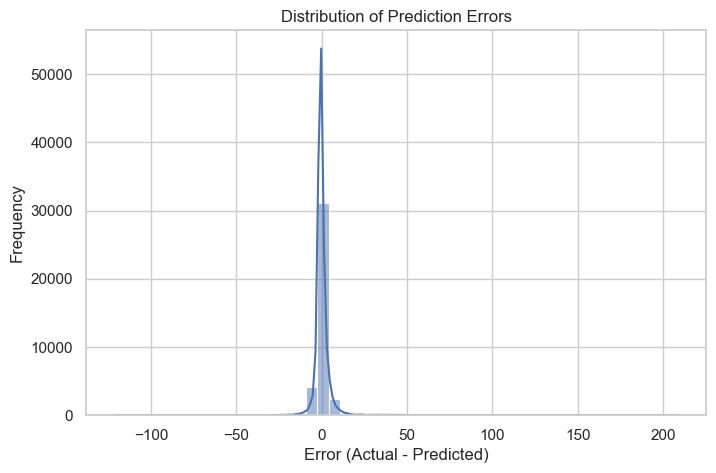

In [4]:
errors = y_test - predictions

plt.figure(figsize=(8,5))
sns.histplot(errors, bins=50, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


### Step 5: Actual vs Predicted Plot  

This scatterplot shows how close predictions are to the real fares.
A perfect model would lie exactly on the diagonal line.


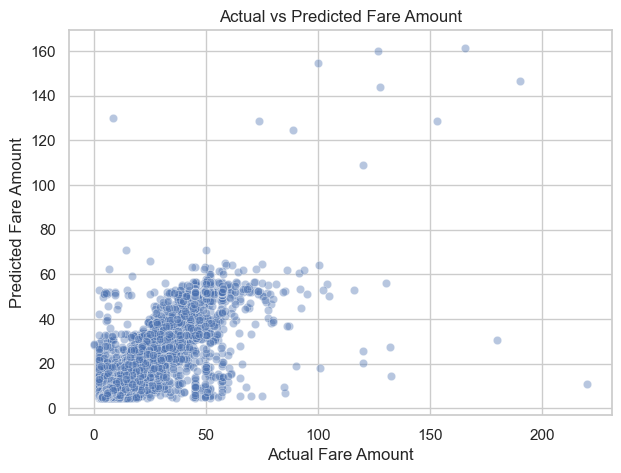

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=predictions, alpha=0.4)
plt.title("Actual vs Predicted Fare Amount")
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.show()

### Step 6: Feature Importance  

Random Forest helps identify which variables influence fare the most.

This improves:
- Interpretability  
- Business understanding  


In [6]:
feature_importances = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importances


,Feature,Importance
3,distance_km,9.711698e-01
1,pickup_hour,1.421240e-02
2,pickup_dayofweek,7.005801e-03
6,time_of_day_Night,4.931715e-03
0,passenger_count,1.703993e-03
5,time_of_day_Morning,5.458134e-04
4,time_of_day_Evening,4.298938e-04
7,distance_category_Medium,4.800964e-07
8,distance_category_Long,1.410986e-07


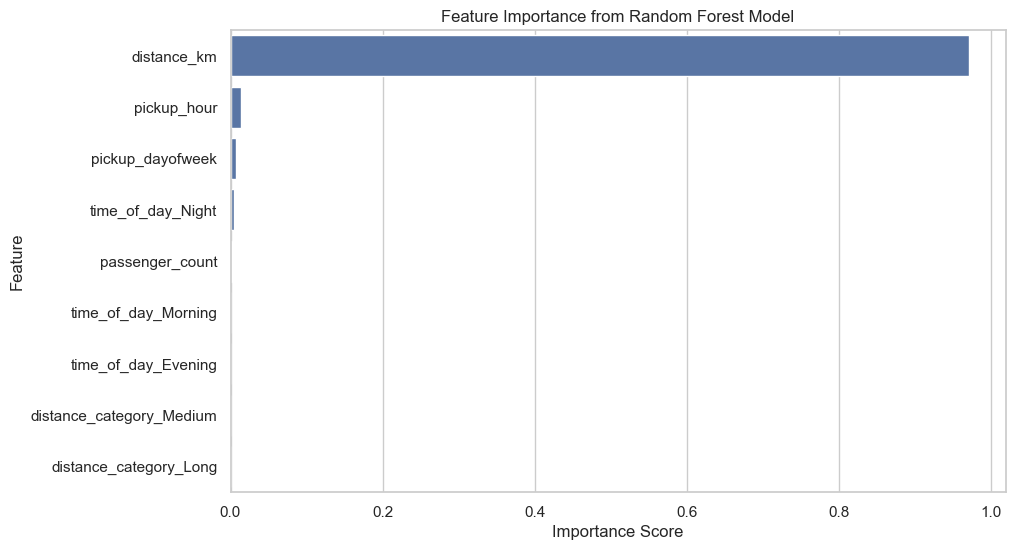

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### Step 7: Insights & Interpretation

#### 🔹 1. Best Performing Model
- The tuned **Random Forest model** gives the best accuracy among all models tried.
- High **R² score** means it explains most of the variation in fare amounts.

#### 🔹 2. Most Influential Features
According to feature importance:
1. **distance_km** → The most important driver of fare  
2. **pickup_hour** → Peak hours increase fares  
3. **pickup_dayofweek** → Weekend vs Weekday patterns  
4. **passenger_count** → Slight influence  
5. **time_of_day** categories → Useful for capturing hourly patterns  

#### 🔹 3. Error Analysis  
- Errors are small and centered around zero → model performs consistently  
- A few larger errors appear for very long or unusual trips (common in real datasets)

#### 🔹 4. Business Understanding  
- Distance is the biggest factor determining fare  
- Time-based features help capture demand and traffic effects  
- This model can be used to estimate Uber fares accurately for future rides  


### Step 8: Save Model Predictions  

This can be used for reporting or dashboards.


In [8]:
output = pd.DataFrame({
    "Actual Fare": y_test,
    "Predicted Fare": predictions
})

output.to_csv("model_predictions.csv", index=False)

print("Predictions saved as model_predictions.csv")


Predictions saved as model_predictions.csv


# Model Evaluation Completed

In this notebook, I:
- Evaluated the tuned Random Forest model  
- Analyzed prediction errors  
- Compared predictions with actual fares  
- Identified most important features  
- Summarized key insights  